<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/CV/01_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D

import matplotlib.pyplot as plt
from IPython.display import Image

# 가장 기본적인 Vanilla Auto-Encoder 구현

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = tf.keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = tf.keras.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


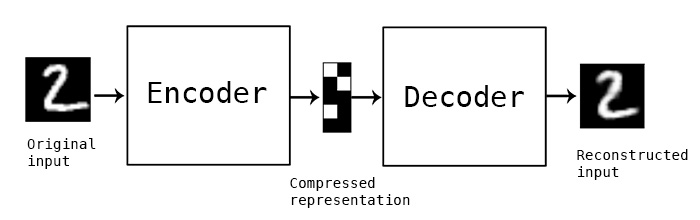

In [ ]:
Image('img/autoencoder_schema.jpg')

## Encoder 부분만 떼어내기

In [ ]:
# This model maps an input to its encoded representation
encoder = tf.keras.Model(input_img, encoded)

## Decoder 부분만 떼어내기

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = tf.keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


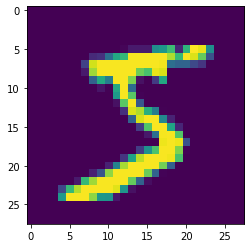

In [ ]:
plt.imshow(x_train[0]/255, interpolation='nearest')
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 2s 5ms/step - loss: 0.2751 - val_loss: 0.1904
Epoch 2/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1715 - val_loss: 0.1542
Epoch 3/15
235/235 [==============================] - 1s 5ms/step - loss: 0.1448 - val_loss: 0.1343
Epoch 4/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1290 - val_loss: 0.1216
Epoch 5/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1186 - val_loss: 0.1134
Epoch 6/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1114 - val_loss: 0.1071
Epoch 7/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1064 - val_loss: 0.1030
Epoch 8/15
235/235 [==============================] - 1s 4ms/step - loss: 0.1025 - val_loss: 0.0995
Epoch 9/15
235/235 [==============================] - 1s 4ms/step - loss: 0.0996 - val_loss: 0.0971
Epoch 10/15
235/235 [==============================] - 1s 4ms/step - loss: 0.0975 - val_loss: 0.0955

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 621us/step


In [ ]:
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


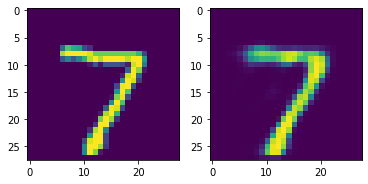

In [ ]:
fig = plt.figure(figsize=(6, 3))

fig.add_subplot(1, 2, 1) # row, column, n번째 image
plt.imshow(x_test[0].reshape(28, 28)/255, interpolation='nearest')

fig.add_subplot(1, 2, 2)
plt.imshow(decoded_imgs[0].reshape(28, 28)/255, interpolation='nearest')